# Day 3 (1/1/2021)
First code of the year, hope all of cells wil be ran <3

## Phase 0: Preparation

In [ ]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import dataset

vgsales = pd.read_csv("E:/Python/Video Game Sales/vgsales.csv")
vgsales.head(10)

## Phase 1: Clean data

In [84]:
# Info

vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
 11  Revenue       0 non-null      float64
dtypes: float64(6), int64(2), object(4)
memory usage: 2.1+ MB


In [ ]:
# Check null

vgsales.isnull().sum()

In [ ]:
# Drop Na

vgsales.dropna(inplace= True)

In [ ]:
# Check Unique Genre

vgsales["Genre"].unique()

In [ ]:
# Check Unique Platform

vgsales["Platform"].unique()

In [ ]:
# Check Unique Publisher

vgsales["Publisher"].unique()

In [ ]:
vgsales.head(5)

In [ ]:
# Change Year to int64

vgsales["Year"] = vgsales["Year"].astype("int64")

## Phase 2: Analyze

### 1. What genre games have been made the most?

In [ ]:
count_genre = vgsales["Genre"].value_counts()
count_genre.head(1)


=> Action: 3251

In [ ]:
count_genre.plot(kind = "bar", title = "Count of Genre")
plt.xticks(rotation = 45)
plt.show()

### 2. Which year had the most game release?

In [ ]:
vgsales.head(5)

In [ ]:
count_year = vgsales["Year"].value_counts()
count_year.sort_values(ascending= False).head(5)

2009: 1431
2008: 1428
2010: 1257    
2007: 1201
2011: 1136

In [ ]:
count_year.plot(kind = "bar", title = "Count of Year", figsize = (10,5))
plt.xticks(rotation = 45)
plt.show()

### 3. Top 5 years games release by genre.

In [25]:
vgsales.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 0)
sns.countplot( x = "Year", data = vgsales, hue = "Genre",order = vgsales["Year"].value_counts(ascending = False).iloc[0:5].index)
plt.title("Top 5 Years by Genre")
plt.show()

### 4. Which year had the highest sales worldwide?


In [112]:
year_most_sales = pd.pivot_table(data = vgsales, values= "Global_Sales", index= "Year", aggfunc= "sum")
year_most_sales.sort_values(by = "Global_Sales", ascending=False).head(5)

,Global_Sales
Year,
2008,678.90
2009,667.30
2007,609.92
2010,600.29
2006,521.04


=> 2008: 678.90

### 5. Which genre game has been released the most in a single year?

In [87]:
genre_release_most_1y = vgsales.groupby(by = "Year")
genre_release_most_1y["Genre"].describe().sort_values(ascending= False, by = "freq").head(5)

,count,unique,top,freq
Year,,,,
2009,1431,12,Action,272
2012,655,12,Action,265
2015,614,12,Action,255
2011,1136,12,Action,239
2010,1257,12,Action,226


=> Action: 272

### 6. Which genre game has sold the most in a single year?

In [ ]:
genre_sold_most_1y = vgsales.groupby(by = "Year")
genre_sold_most_1y["Global_Sales"].describe().sort_values(by = "max",ascending= False).head(5)

In [ ]:
pd.pivot_table(data = vgsales, index= "Year", columns= "Genre", values= "Global_Sales", aggfunc="sum")

### 7. Which genre game have the highest sale price globally

In [ ]:
genre_most_global_sales = pd.pivot_table(data = vgsales, index="Genre", values= "Global_Sales", aggfunc= "sum")
genre_most_global_sales.sort_values(by = "Global_Sales", ascending= False).head(5)

=> Action: 1722.84

### 
8. Which platfrom have the highest sale price globally


In [ ]:
platform_most_global_sales = pd.pivot_table(data = vgsales, index= "Platform", values= "Global_Sales", aggfunc= "sum")
platform_most_global_sales.sort_values(by = "Global_Sales", ascending= False).head(5)

=> PS2: 1233.46

### 9. Which individual game have the highest sale price globally?

In [ ]:
game_most_global_sales = pd.pivot_table(data = vgsales, index= "Name", values= "Global_Sales", aggfunc= "sum")
game_most_global_sales.sort_values(by = "Global_Sales", ascending= False).head(5)

=> Wii Sports: 82.74

### 10. Sales comparison by genre


In [27]:
sales_comparision_genre = pd.pivot_table(data = vgsales, index = "Genre", values= vgsales[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]], aggfunc= "sum")
sales_comparision_genre.sort_values(by = "Global_Sales", ascending= False)

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Genre,,,,,
Action,516.48,1722.84,158.65,861.77,184.92
Sports,371.34,1309.24,134.76,670.09,132.65
Shooter,310.45,1026.20,38.18,575.16,101.90
Role-Playing,187.57,923.83,350.29,326.50,59.38
Platform,200.65,829.13,130.65,445.99,51.51
Misc,211.77,789.87,106.67,396.92,73.92
Racing,236.31,726.76,56.61,356.93,76.68
Fighting,100.00,444.05,87.15,220.74,36.19
Simulation,113.02,389.98,63.54,181.78,31.36


=> Action is the highest in all

### 11. Sales comparison by platform

In [35]:
sales_comparision_plaform = pd.pivot_table(data = vgsales, values= vgsales[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]], index = "Platform", aggfunc= "sum")
sales_comparision_plaform.sort_values(by = "Global_Sales", ascending= False)

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Platform,,,,,
PS2,332.63,1233.46,137.54,572.92,190.47
X360,278.00,969.60,12.30,594.33,84.67
PS3,340.47,949.35,79.21,388.90,140.81
Wii,264.35,909.81,68.28,497.37,79.20
DS,194.05,818.91,175.02,388.53,60.29
PS,212.38,727.39,139.78,334.71,40.69
GBA,72.49,305.62,46.56,178.43,7.51
PSP,67.16,291.71,75.89,107.09,41.52
PS4,123.70,278.10,14.30,96.80,43.36


EU Sales: PS3
Global Sales: PS2
Japan Sales: DS
NA Sales: X360
Others Sales: PS2


### 12. Top 20 Publisher

In [44]:
top_20_publisher_release = vgsales.groupby(by = "Publisher")
top_20_publisher_release["Name"].describe().sort_values(by = "freq", ascending= False).head(20)

,count,unique,top,freq
Publisher,,,,
Electronic Arts,1339,605,Need for Speed: Most Wanted,12
Warner Bros. Interactive Entertainment,217,73,LEGO Marvel Super Heroes,9
THQ,712,406,Ratatouille,9
Activision,966,414,Angry Birds Star Wars,8
LucasArts,89,42,LEGO Star Wars II: The Original Trilogy,7
Eidos Interactive,196,123,Tomb Raider: Legend,7
Disney Interactive Studios,214,109,LEGO Pirates of the Caribbean: The Video Game,7
Take-Two Interactive,412,201,Major League Baseball 2K11,7
Konami Digital Entertainment,823,634,Pro Evolution Soccer 2012,7


In [46]:
top_20_publisher_sales = pd.pivot_table(data = vgsales, index= "Publisher", values= "Global_Sales", aggfunc= "sum")
top_20_publisher_sales.sort_values(by = "Global_Sales", ascending = False).head(20)

,Global_Sales
Publisher,
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.54
Take-Two Interactive,399.30
THQ,340.44
Konami Digital Entertainment,278.56
Sega,270.70


### 13. Top global sales by publisher

In [48]:
top_global_sales_publisher = pd.pivot_table(data = vgsales, values= "Global_Sales", index = "Publisher", aggfunc="sum")
top_global_sales_publisher.sort_values(by = "Global_Sales", ascending = False).head(1)

,Global_Sales
Publisher,
Nintendo,1784.43


=> Nintendo: 1784.43

### 14. Total revenue by region

In [88]:
revenue_region = vgsales[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
revenue_region = pd.DataFrame(revenue_region.sum()).reset_index()
revenue_region.rename(columns={"index":"Region",0:"Sales"},inplace= True)
revenue_region

,Region,Sales
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91
4,Global_Sales,8811.97


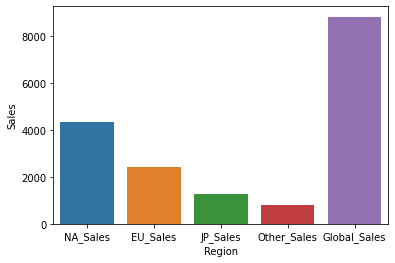

<Figure size 864x576 with 0 Axes>

In [97]:
sns.barplot(x = "Region", y = "Sales", data = revenue_region)
plt.figure(figsize=(12,8))
plt.show()

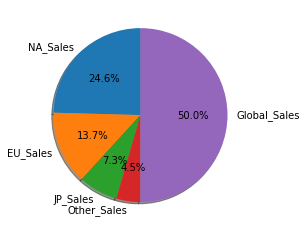

<Figure size 864x720 with 0 Axes>

In [105]:
plt.pie(revenue_region['Sales'], labels=revenue_region['Region'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.figure(figsize = (12,10))
plt.show()